In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_digits
digits = load_digits()
digits.key()

# 4:Random Forests

## Visualize Your Data Images With matplotlib

 Then, you can take your exploration up a notch by visualizing the images that you’ll be working with. You can use one of Python’s data visualization libraries, such as matplotlib, for this purpose:

In [ ]:
fig = plt.fidure=(6, 6)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xtcks=[], yticks=[])
    ax.imshow(digits.images[i], cmap-plt.cm.binary, interpolation='nearest')
    ax.test(0, 7, str(digits.target[i]))

    

The code chunk seems quite lengthy at first sight, and this might be overwhelming. But, what happens in the code chunk above is actually pretty easy once breaking it down into parts:
- import matplotlib.pyplot.
- Next, setting up a figure with a figure size of 6 inches wide and 6 inches long. This is the blank canvas where all the subplots with the images will appear.
- Then Create the level of the subplots to adjust some parameters: setting the left side of the suplots of the figure to 0, the right side of the suplots of the figure to 1, the bottom to 0 and the top to 1. The height of the blank space between the suplots is set at 0.005 and the width is set at 0.05. These are merely layout adjustments.
- Starting filling up the figure that you have made with the help of a for loop.
- And initializing the suplots one by one, adding one at each position in the grid that is 8 by 8 images big.
- And to  display each time one of the images at each position in the grid. As a color map, then taking binary colors, which in this case will result in black, gray values and white colors. The interpolation method that if this is used  'nearest', which means that data is interpolated in such a way that it isn’t smooth. Then Seeing the effect of the different interpolation methods here.
- The cherry on the pie is the addition of text to the subplots. The target labels are printed at coordinates (0,7) of each subplot, which in practice means that they will appear in the bottom-left of each of the subplots.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data. digit.target, random_state=0)
tree = DecisionTreeClassifier()
tre.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("performance report on a my Random Forest classifier\n".format(metrics.classification_report(y_pred, y_test)))
print(metrics.classification_report(y_pred, y_test))

In [ ]:

rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("performance report on a my Random Forest classifier\n".format(metrics.classification_report(y_pred, y_test)))
print(metrics.classification_report(y_pred, y_test))

After checking the model’s performance with multiple combinations, although not all, RandomizedSearchCV returns the best or the optimal values of the parameters for which the model performed the best.

The above code is to classify manually written numbers. Each number is represented by a 8*8
matrix (say, a place in that matrix is black, then value will be 1, otherwise 0 - simplified)

## Tasks:

a) Run the above code and explore the dataset - http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

i. You can display the digits following instructions from scikit-learn documentation

(1797, 64)


<Figure size 432x288 with 0 Axes>

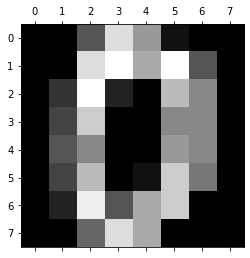

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()



If Using read_csv() to import the data,  to have had a data frame that contains just the data. There wouldn’t be any description component, but to will be able to resort to, for example, head() or tail() to inspect data. 


 b) Notice there’re two classifiers; DT and Random Forest. Evaluation of classification is provided
by metrics.classification_report() method, explore the following:


i. Evaluate difference in accuracy between DT and RF.

ii. Tune the number of n_estimator value of RF and explore Accuracy. Increase it to 10, 20, 100 and
discuss results.

 iii. What is printed by metrics.classification_report()? Explore the meaning of each of the
outcomes - you can refer to scikit-learn documentation


iv. Does RandomForestClassifier have further parameters to tune? For instance, try changing
the criterion for the split from Gini to Entropy and evaluate outcomes on prediction

 c) Apply RandomForestRegressor on Boston housing Dataset of last week and compare with the
linear regression you implemented.
hint: classifier should be imported as: from sklearn.ensemble import RandomForestRegressor

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Motivating Random Forests: Decision Trees

Random forests are an example of an ensemble learner built on decision trees. For this reason we'll start by discussing decision trees themselves.

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification. 

 The binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes. The trick, of course, comes in deciding which questions to ask at each step. 

### Creating a decision tree

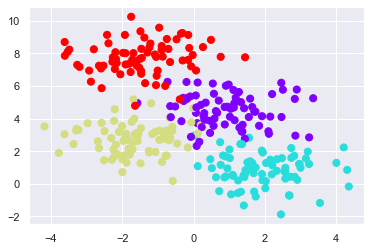

In [14]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [16]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_2436/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


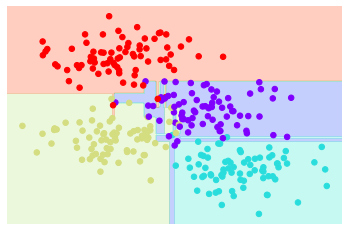

In [17]:
visualize_classifier(DecisionTreeClassifier(), X, y)

### Decision trees and over-fitting

### Ensembles of Estimators: Random Forests

This type of bagging classification can be done manually using Scikit-Learn's BaggingClassifier meta-estimator, as shown here:

C:\Users\ASUS\AppData\Local\Temp/ipykernel_2436/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


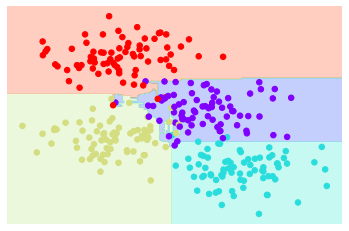

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

To have randomized the data by fitting each estimator with a random subset of 80% of the training points. In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness. 

In Scikit-Learn, such an optimized ensemble of randomized decision trees is implemented in the RandomForestClassifier estimator, which takes care of all the randomization automatically. 

C:\Users\ASUS\AppData\Local\Temp/ipykernel_2436/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


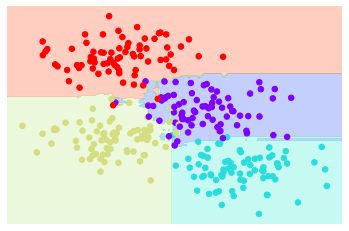

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

To  see that by averaging over 100 randomly perturbed models, we end up with an overall model that is much closer to our intuition about how the parameter space should be split.

### Random Forest Regression

 In the previous section we considered random forests within the context of classification. Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for this is the RandomForestRegressor, and the syntax is very similar to what we saw earlier.

 Consider the following data, drawn from the combination of a fast and slow oscillation:

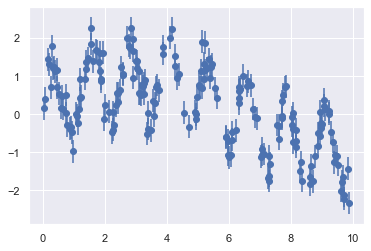

In [22]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

Using the random forest regressor, we can find the best fit curve as follows:

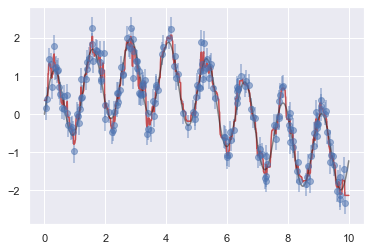

In [23]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

### Random Forest for Classifying Digits¶

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

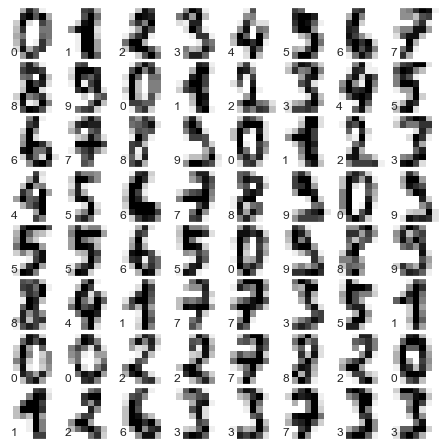

In [33]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))


The digits using a random forest as follows:

In [37]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

 The classification report for this classifier:

In [38]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



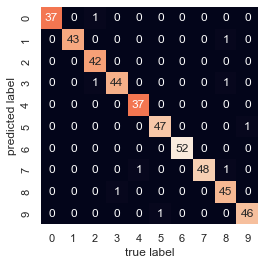

In [39]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

 This section contained a brief introduction to the concept of ensemble estimators, and in particular the random forest – an ensemble of randomized decision trees. Random forests are a powerful method with several advantages:

Both training and prediction are very fast, because of the simplicity of the underlying decision trees. In addition, both tasks can be straightforwardly parallelized, because the individual trees are entirely independent entities.
The multiple trees allow for a probabilistic classification: a majority vote among estimators gives an estimate of the probability (accessed in Scikit-Learn with the predict_proba() method).
The nonparametric model is extremely flexible, and can thus perform well on tasks that are under-fit by other estimators.